In [1]:
# @itsvenu_
# ThompsonSampling

# Ni_1(n)
# Ni_0(n)

# theta_i(n) = beta(Ni_1(n)+1, Ni_0+1)
# select ad with highest theta_i(n)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
dat = pd.read_csv('../../data/Ads_CTR_Optimisation.csv')
dat.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [51]:
# Implement ThompsonSampling

N = 10000 # users
d = 10 # ads

ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_rewards = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    
    ads_selected.append(ad)
    reward = dat.values[n, i]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad]+1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad]+1
        
    total_rewards = total_rewards + reward        

In [52]:
numbers_of_rewards_1

[44, 27, 12, 70, 135, 13, 84, 61, 19, 24]

In [53]:
numbers_of_rewards_0

[925, 636, 351, 1313, 2223, 349, 1549, 1183, 459, 523]

Text(0.5, 1.0, 'Ad that attracts more users')

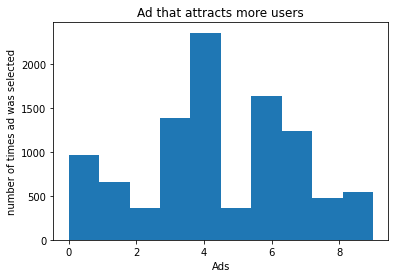

In [54]:
plt.hist(ads_selected)
plt.xlabel('Ads')
plt.ylabel('number of times ad was selected')
plt.title('Ad that attracts more users')

In [ ]:
# with 10k users data, UCB & Thompson sampling 
# are performing reasonably good. However, from experts,
# ThompsonSampling is less complex and can reach convergence 
# with less user data